In [2]:
#JUAN DIEGO POZO ORTIZ 
# CÓDIGO: 20210679


In [3]:
from  fiona import listlayers
import os

thailandMaps=os.path.join('maps','thailandMaps_4239.gpkg')

#layers in maps
listlayers(thailandMaps)

['airports', 'states', 'municipalities', 'country', 'cities', 'rivers']

In [4]:
import os
import geopandas as gpd

states=gpd.read_file(thailandMaps,layer='states')
municipalities=gpd.read_file(thailandMaps,layer='municipalities')
airports=gpd.read_file(thailandMaps,layer='airports')
rivers=gpd.read_file(thailandMaps,layer='rivers')




In [5]:
import pandas as pd 


portsFile=os.path.join('data','UpdatedPub150.csv')

infoseaports=pd.read_csv(portsFile)

infoseaports.columns.to_list()

['World Port Index Number',
 'Region Name',
 'Main Port Name',
 'Alternate Port Name',
 'UN/LOCODE',
 'Country Code',
 'World Water Body',
 'IHO S-130 Sea Area',
 'Sailing Direction or Publication',
 'Publication Link',
 'Standard Nautical Chart',
 'IHO S-57 Electronic Navigational Chart',
 'IHO S-101 Electronic Navigational Chart',
 'Digital Nautical Chart',
 'Tidal Range (m)',
 'Entrance Width (m)',
 'Channel Depth (m)',
 'Anchorage Depth (m)',
 'Cargo Pier Depth (m)',
 'Oil Terminal Depth (m)',
 'Liquified Natural Gas Terminal Depth (m)',
 'Maximum Vessel Length (m)',
 'Maximum Vessel Beam (m)',
 'Maximum Vessel Draft (m)',
 'Offshore Maximum Vessel Length (m)',
 'Offshore Maximum Vessel Beam (m)',
 'Offshore Maximum Vessel Draft (m)',
 'Harbor Size',
 'Harbor Type',
 'Harbor Use',
 'Shelter Afforded',
 'Entrance Restriction - Tide',
 'Entrance Restriction - Heavy Swell',
 'Entrance Restriction - Ice',
 'Entrance Restriction - Other',
 'Overhead Limits',
 'Underkeel Clearance Manage

In [6]:

infoseaports.rename(columns={'Main Port Name':'portName'},inplace=True)

infoseaports=infoseaports.loc[:,['portName', 'Country Code','Latitude', 'Longitude']]


infoseaports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3739 entries, 0 to 3738
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   portName      3739 non-null   object 
 1   Country Code  3739 non-null   object 
 2   Latitude      3739 non-null   float64
 3   Longitude     3739 non-null   float64
dtypes: float64(2), object(2)
memory usage: 117.0+ KB


In [7]:
infoseaports.head()

,portName,Country Code,Latitude,Longitude
0,Maurer,United States,40.533333,-74.250000
1,Mangkasa Oil Terminal,Indonesia,-2.733333,121.066667
2,Iharana,Madagascar,-13.350000,50.000000
3,Andoany,Madagascar,-13.400000,48.300000
4,Chake Chake,Tanzania,-5.250000,39.766667


In [8]:
seaports=gpd.GeoDataFrame(data=infoseaports.copy(),
                           geometry=gpd.points_from_xy(infoseaports.Longitude,
                                                       infoseaports.Latitude), 
                          crs=3739)

# subset:
seaports_tha=seaports[seaports['Country Code']=='Thailand'].copy()

# reset indexes
seaports_tha.reset_index(drop=True, inplace=True)

# reprojecting
seaports_tha_4239=seaports_tha.to_crs(4239)

<Axes: >

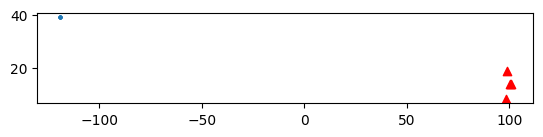

In [9]:
largeAirports=airports[airports['kind']=='large_airport'] 
largeAirports.reset_index(drop=True, inplace=True)

#plotting
base=largeAirports.plot(color='red',marker="^")
seaports_tha_4239.plot(ax=base,alpha=0.5,markersize=3)

In [10]:
seaports_tha_4239.head()

,portName,Country Code,Latitude,Longitude,geometry
0,Bongkot Terminal,Thailand,8.050000,102.333333,POINT (-119.34058 39.22942)
1,Petchburi Terminal,Thailand,13.166667,100.150000,POINT (-119.34059 39.22943)
2,Krabi,Thailand,8.066667,98.916667,POINT (-119.34059 39.22942)
3,Bang Saphan,Thailand,11.183333,99.600000,POINT (-119.34059 39.22943)
4,Benchamas Terminal,Thailand,10.516667,101.250000,POINT (-119.34058 39.22942)


In [11]:
largeAirports.head()

,name,kind,latitude_deg,longitude_deg,elevation_ft,region_name,municipality,geometry
0,Suvarnabhumi Airport,large_airport,13.6811,100.747002,5.0,Bangkok (special administrative area),Bangkok,POINT (100.75039 13.67935)
1,Don Mueang International Airport,large_airport,13.9126,100.607002,9.0,Bangkok (special administrative area),Bangkok,POINT (100.61038 13.91087)
2,Phuket International Airport,large_airport,8.1132,98.316902,82.0,Phuket Province,Phuket,POINT (98.31993 8.11106)
3,Chiang Mai International Airport,large_airport,18.7668,98.962601,1036.0,Chiang Mai Province,Chiang Mai,POINT (98.96585 18.76550)


In [12]:
largeAirports.iloc[0].geometry.distance(seaports_tha_4239.iloc[0].geometry)/1000

0.22156904084997747

In [13]:
seaports_tha_4239.geometry.apply\
(lambda g: largeAirports.geometry.distance(g)/1000)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17200\2836562890.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  (lambda g: largeAirports.geometry.distance(g)/1000)


,0,1,2,3
0,0.221569,0.221403,0.219874,0.219263
1,0.221569,0.221403,0.219874,0.219263
2,0.221569,0.221403,0.219874,0.219263
3,0.221569,0.221403,0.219874,0.219263
4,0.221569,0.221403,0.219874,0.219263
5,0.221569,0.221403,0.219874,0.219263
6,0.221569,0.221403,0.219874,0.219263
7,0.221569,0.221403,0.219874,0.219263
8,0.221569,0.221403,0.219874,0.219263
9,0.221569,0.221403,0.219874,0.219263


In [14]:
seaports_tha_4239.set_index('portName').geometry.apply\
(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17200\2502738571.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  (lambda g: largeAirports.set_index('name').geometry.distance(g)/1000)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17200\2502738571.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  (lambda g: largeAirports.set_index('name').geometry.distance(g)/1000)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17200\2502738571.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  (lambda g: largeAirports.set_index('name').geometry.distance(g)/1000)
C:\Users\Lenovo\AppData\L

name,Suvarnabhumi Airport,Don Mueang International Airport,Phuket International Airport,Chiang Mai International Airport
portName,,,,
Bongkot Terminal,0.221569,0.221403,0.219874,0.219263
Petchburi Terminal,0.221569,0.221403,0.219874,0.219263
Krabi,0.221569,0.221403,0.219874,0.219263
Bang Saphan,0.221569,0.221403,0.219874,0.219263
Benchamas Terminal,0.221569,0.221403,0.219874,0.219263
Sattahip,0.221569,0.221403,0.219874,0.219263
Songkhla Harbor,0.221569,0.221403,0.219874,0.219263
Erawan Terminal,0.221569,0.221403,0.219874,0.219263
Khanom,0.221569,0.221403,0.219874,0.219263


In [15]:
seaports_tha_4239.set_index('portName').geometry.apply\
(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17200\1049258179.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  (lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17200\1049258179.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  (lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17200\1049258179.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  (lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
C:\Users\Lenovo\App

name,Chiang Mai International Airport,Don Mueang International Airport,Phuket International Airport,Suvarnabhumi Airport
portName,,,,
Bang Saphan,0.219263,0.221403,0.219874,0.221569
Bangkok,0.219263,0.221403,0.219874,0.221569
Benchamas Terminal,0.219263,0.221403,0.219874,0.221569
Bongkot Terminal,0.219263,0.221403,0.219874,0.221569
Erawan Terminal,0.219263,0.221403,0.219874,0.221569
Kantang Harbor,0.219263,0.221403,0.219874,0.221569
Khanom,0.219263,0.221403,0.219874,0.221569
Ko Si Chang Terminal,0.219263,0.221403,0.219874,0.221569
Krabi,0.219263,0.221403,0.219874,0.221569


In [17]:
distanceMatrixKM_sea_air= seaports_tha_4239.set_index('portName').geometry.apply\
                          (lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
                          sort_index(axis=0).sort_index(axis=1)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17200\3362543196.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  (lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17200\3362543196.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  (lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17200\3362543196.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  (lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
C:\Users\Lenovo\App

In [18]:
distanceMatrixKM_sea_air.mean(axis=1).sort_values(ascending=True)

portName
Bongkot Terminal            0.220527
Pattani                     0.220527
Erawan Terminal             0.220527
Tantawan Marine Terminal    0.220527
Benchamas Terminal          0.220527
Songkhla Harbor             0.220527
Rayong Tpi Terminal         0.220527
Map Ta Phut                 0.220527
Sattahip                    0.220527
Si Racha                    0.220527
Laem Chabang                0.220527
Si Racha Terminal           0.220527
Siam Seaport                0.220527
Ko Si Chang Terminal        0.220527
Khanom                      0.220527
Kantang Harbor              0.220527
Bangkok                     0.220527
Petchburi Terminal          0.220527
Bang Saphan                 0.220527
Krabi                       0.220527
Phuket                      0.220527
dtype: float64

In [20]:
SomeStats=pd.DataFrame()
SomeStats['mean']=distanceMatrixKM_sea_air.mean(axis=1)
SomeStats['min']=distanceMatrixKM_sea_air.min(axis=1)
SomeStats['max']=distanceMatrixKM_sea_air.max(axis=1)

In [21]:
distanceMatrixKM_sea_air.idxmax(axis=1)

portName
Bang Saphan                 Suvarnabhumi Airport
Bangkok                     Suvarnabhumi Airport
Benchamas Terminal          Suvarnabhumi Airport
Bongkot Terminal            Suvarnabhumi Airport
Erawan Terminal             Suvarnabhumi Airport
Kantang Harbor              Suvarnabhumi Airport
Khanom                      Suvarnabhumi Airport
Ko Si Chang Terminal        Suvarnabhumi Airport
Krabi                       Suvarnabhumi Airport
Laem Chabang                Suvarnabhumi Airport
Map Ta Phut                 Suvarnabhumi Airport
Pattani                     Suvarnabhumi Airport
Petchburi Terminal          Suvarnabhumi Airport
Phuket                      Suvarnabhumi Airport
Rayong Tpi Terminal         Suvarnabhumi Airport
Sattahip                    Suvarnabhumi Airport
Si Racha                    Suvarnabhumi Airport
Si Racha Terminal           Suvarnabhumi Airport
Siam Seaport                Suvarnabhumi Airport
Songkhla Harbor             Suvarnabhumi Airport
Tantawan Ma

In [22]:
distanceMatrixKM_sea_air.idxmax(axis=0)

name
Chiang Mai International Airport    Phuket
Don Mueang International Airport    Phuket
Phuket International Airport        Phuket
Suvarnabhumi Airport                Phuket
dtype: object

In [23]:
distanceMatrixKM_sea_air.idxmin(axis=1)

portName
Bang Saphan                 Chiang Mai International Airport
Bangkok                     Chiang Mai International Airport
Benchamas Terminal          Chiang Mai International Airport
Bongkot Terminal            Chiang Mai International Airport
Erawan Terminal             Chiang Mai International Airport
Kantang Harbor              Chiang Mai International Airport
Khanom                      Chiang Mai International Airport
Ko Si Chang Terminal        Chiang Mai International Airport
Krabi                       Chiang Mai International Airport
Laem Chabang                Chiang Mai International Airport
Map Ta Phut                 Chiang Mai International Airport
Pattani                     Chiang Mai International Airport
Petchburi Terminal          Chiang Mai International Airport
Phuket                      Chiang Mai International Airport
Rayong Tpi Terminal         Chiang Mai International Airport
Sattahip                    Chiang Mai International Airport
Si Racha       

In [24]:
distanceMatrixKM_sea_air.idxmin(axis=0)

name
Chiang Mai International Airport    Bongkot Terminal
Don Mueang International Airport    Bongkot Terminal
Phuket International Airport        Bongkot Terminal
Suvarnabhumi Airport                Bongkot Terminal
dtype: object

In [30]:
rivers

,NAME,SYSTEM,geometry
0,Mekong,None,"MULTILINESTRING ((101.70515 17.92024, 101.8116..."
1,Salween,None,"MULTILINESTRING ((97.91963 17.57306, 97.96491 ..."


In [44]:
rivers[rivers.NAME.str.contains('Salween')]

,NAME,SYSTEM,geometry


In [32]:
rivers[rivers.NAME.str.contains('Salween')].iloc[0].geometry.distance(largeAirports.set_index('name').geometry)/1000

name
Suvarnabhumi Airport                0.004814
Don Mueang International Airport    0.004544
Phuket International Airport        0.009470
Chiang Mai International Airport    0.001235
Name: geometry, dtype: float64

In [33]:
distanceMatrixKM_riv_air=rivers.set_index('NAME').geometry.apply\
(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)
distanceMatrixKM_riv_air

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17200\660976210.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  (lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17200\660976210.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  (lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\


name,Chiang Mai International Airport,Don Mueang International Airport,Phuket International Airport,Suvarnabhumi Airport
NAME,,,,
Mekong,0.002867,0.004129,0.010319,0.004315
Salween,0.001235,0.004544,0.009470,0.004814


In [34]:
distanceMatrixKM_riv_air.loc['Mekong'].sort_values()

name
Chiang Mai International Airport    0.002867
Don Mueang International Airport    0.004129
Suvarnabhumi Airport                0.004315
Phuket International Airport        0.010319
Name: Mekong, dtype: float64

In [35]:
base=largeAirports.explore(color='red',marker_kwds=dict(radius=10))
rivers[rivers.NAME.str.contains('Salween')].explore(m=base)

In [48]:
rivers[~rivers.SYSTEM.isna()]

,NAME,SYSTEM,geometry


In [37]:
systems=rivers.dissolve(by='SYSTEM')
systems

,geometry,NAME
SYSTEM,,


In [38]:
systems.reset_index(drop=False,inplace=True)
systems.drop(columns='NAME',inplace=True)

# we have
systems

,SYSTEM,geometry


In [40]:
distanceMatrixKM_sys_air=systems.set_index('SYSTEM').geometry.apply\
(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=0)

distanceMatrixKM_sys_air

GeoSeries([], Name: geometry, dtype: geometry)

In [43]:
base=systems.explore()
# the closest
largeAirports[largeAirports.name.isin(mins)].explore(m=base,color='red',marker_kwds=dict(radius=10))
# NOT the closest
largeAirports[~largeAirports.name.isin(mins)].explore(m=base,color='blue',marker_kwds=dict(radius=5))

ValueError: Location values cannot contain NaNs.